In [1]:
import os
import numpy as np
from base import *
from base.train_segmentation_model_cnns import train_segmentation_model_cnns

In [2]:
pth = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI'
pthim = os.path.join(pth, '5x')
pthDL = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset'
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '5x')

Training: TransUNet
TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
750/750 [==============================] - 796s 1s/step - loss: 0.2819 - accuracy: 0.8992 - val_loss: 5.9332 - val_accuracy: 0.4529
Epoch 2/8
750/750 [==============================] - 756s 1s/step - loss: 0.3427 - accuracy: 0.8649 - val_loss: 0.6780 - val_accuracy: 0.7775
Epoch 3/8
750/750 [==============================] - 762s 1s/step - loss: 0.2344 - accuracy: 0.9113 - val_loss: 0.4085 - val_accuracy: 0.8792
Epoch 4/8
750/750 [==============================] - 744s 992ms/step - loss: 0.2019 - accuracy: 0.9247 - val_loss: 1.5039 - val_accuracy: 0.7850
Epoch 5/8
750/750 [==============================] - 749s 999ms/step - loss: 0.2419 - accuracy: 0.9071 - val_loss: 0.2954 - val_accuracy: 0.8922
Epoch 6/8
750/750 [==============================] - 753s 1s/step - loss: 0.1851 - accuracy: 0.9312 - val_loss: 1.0103 - val_accuracy: 0.8304
E

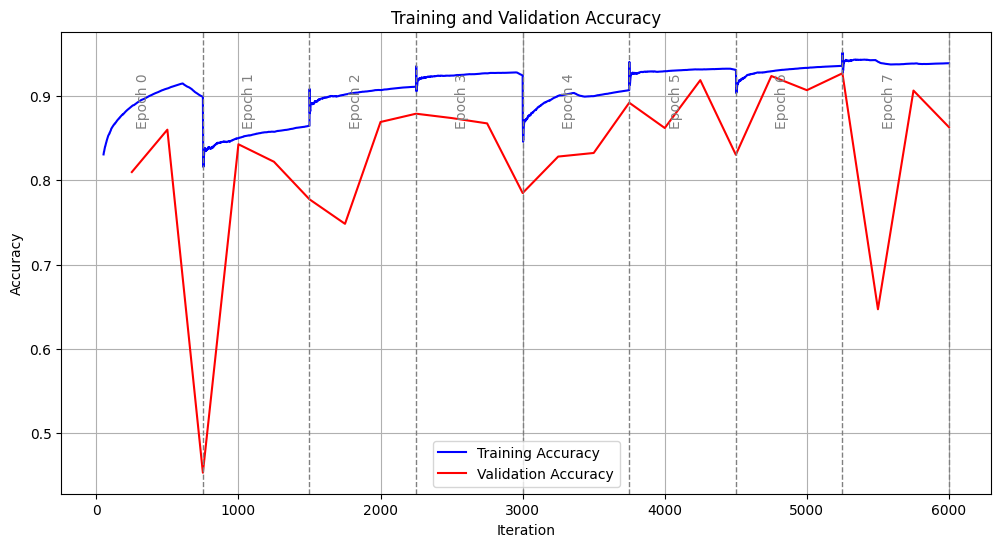

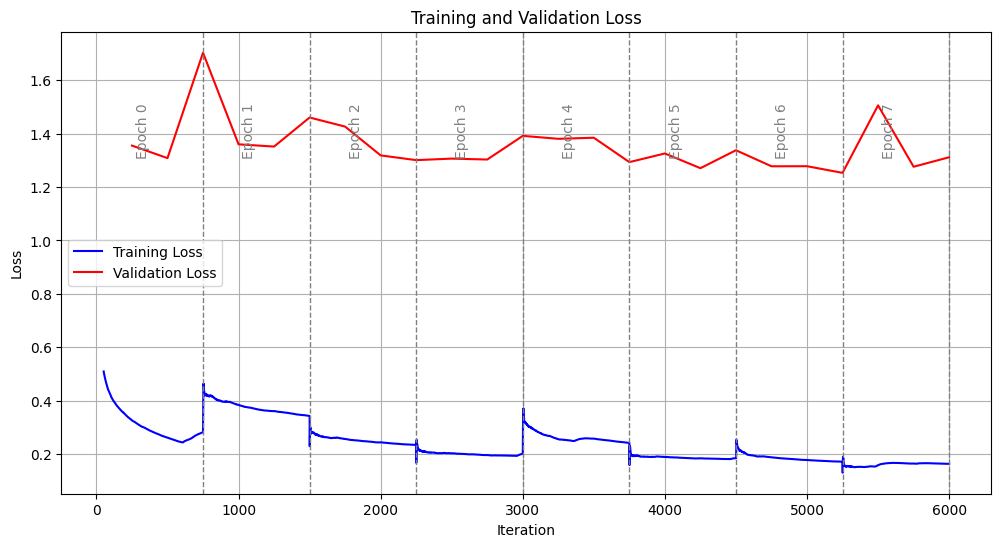

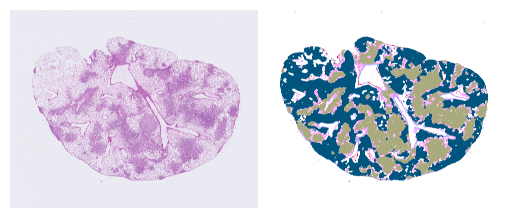


Calculating total number of pixels in the testing dataset...
  There are 45046 pixels of bronchioles, 23% of the most common class.
  There are 115507 pixels of alveoli, 60% of the most common class.
  There are 34798 pixels of vasculature, 18% of the most common class.
  There are 127195 pixels of mets, 66% of the most common class.
  There are 191199 pixels of whitespace. This is the most common class.
  There are 18246 pixels of collagen, 9% of the most common class.


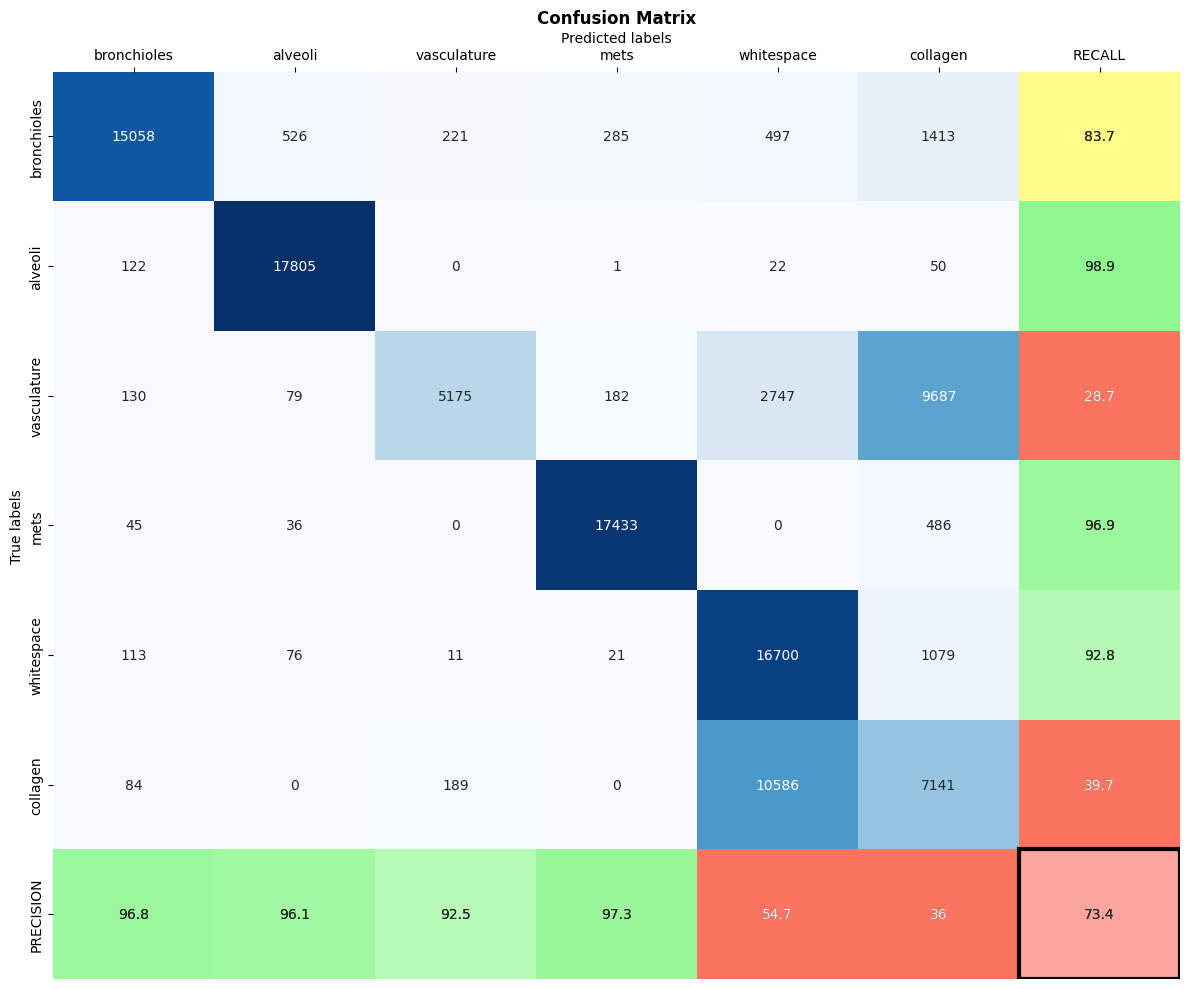


Confusion matrix saved to \\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset\confusion_matrix.jpg

Overall Accuracy: 73.4%
   
  Starting classification of image 1 of 4: 2024-02-26 10.36.39.tif
Image 1 of 4 took 23 s
  Starting classification of image 2 of 4: 84 - 2024-02-26 10.33.40.tif
Image 2 of 4 took 35 s
  Starting classification of image 3 of 4: TVNTC 1-2 2.tif
Image 3 of 4 took 17 s
  Starting classification of image 4 of 4: TVWT 4-1 1.tif
Image 4 of 4 took 29 s
  Total time for classification: 0.0h 2.0m 56.2572865486145s


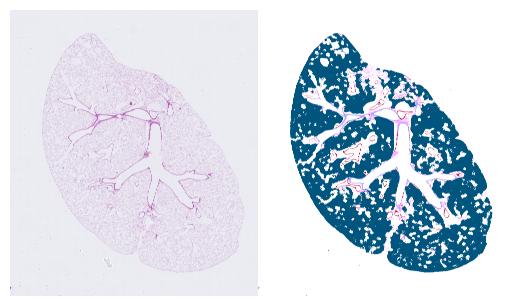

Done training: TransUNet
Training: DeepLabV3_plus
TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')


TypeError: 'int' object is not subscriptable

In [3]:
# CNNs = ["CASe_UNet","UNet3+","TransUNet","DeepLabV3+"]
CNNs = ["TransUNet","DeepLabV3_plus"]
# CNNs = ["DeepLabV3+","UNet3+","TransUNet","CASe_UNet","UNet"]
# its going to fail at deeplab because i changed the input and forgot to update sth on the backbones code, just tun that model after it fails

#Train test and classify an image for each CNN
for cnn_name in CNNs:
    print(f'Training: {cnn_name}')
    # train_segmentation_model(pthDL)
    train_segmentation_model_cnns(pthDL,cnn_name)
    test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name)
    classify_images(pthim,pthDL , cnn_name)
    print(f'Done training: {cnn_name}')

In [2]:
#test model
pth = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI'
pthtest = os.path.join(pth, 'test')
pthtestim = os.path.join(pthtest, '5x')
pthDL = r'\\10.99.134.183\kiemen-lab-data\Valentina Matos\Lung tissue data GUI\CNNs_same_dataset'

cnn_name = "CASe_UNet"

test_segmentation_model(pthDL,pthtest, pthtestim, cnn_name)

Testing segmentation model......
 
Importing annotation data...
 
 Making downsampled images...
Image 1 of 1: TVWT 2-2 2
 annotation data previously loaded


ValueError: A `Concatenate` layer should be called on a list of at least 1 input. Received: input_shape=(None, 64, 64, 512)